In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import k_means
import warnings

warnings.filterwarnings('ignore')


C:\Users\mervi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('EastWestAirlines.csv')
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
# getting the no of columns and rows
df.shape

(3999, 12)

In [4]:
# checking datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


All columns have 3999 non null entries so they don't have null values

All features are numerical features

In [5]:
# getting columns names
df.columns


Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [6]:
# checking for any null values
df.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [8]:
# checking for duplicates
df.duplicated().sum()

0

In [3]:
df.drop(['ID','Award'],axis=1,inplace=True)


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
min_max_scaler=MinMaxScaler()

In [6]:
new_df=min_max_scaler.fit_transform(df)

In [7]:
df=pd.DataFrame(new_df,columns=df.columns)

In [8]:
from sklearn.cluster import KMeans

In [9]:
inertia=[]
for i in range(1,11):
    model=KMeans(n_clusters=i)
    model.fit(df)
    inertia.append(model.inertia_)

In [10]:
inertia

[898.2705822007468,
 448.99891944456994,
 331.4339850871975,
 272.3967143005048,
 241.07935505304195,
 224.5097792712205,
 200.7485617759158,
 188.30075562959087,
 175.62426824654528,
 161.65099419988383]

Text(0, 0.5, 'Inertia')

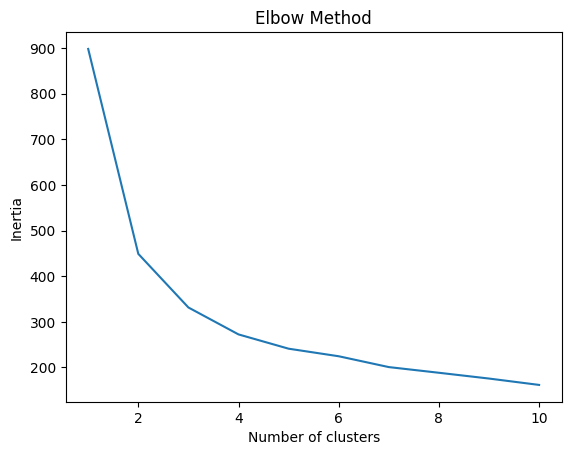

In [11]:
plt.plot(range(1,11),inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [12]:
kmeans=KMeans(n_clusters=3,random_state=0)

In [13]:
kmeans.fit(df)

KMeans(n_clusters=3, random_state=0)

In [14]:
df['Clusters']=kmeans.labels_

In [15]:
df['Clusters'].unique()

array([0, 1, 2])

In [16]:
df['Clusters'].value_counts()

Clusters
0    2532
1    1426
2      41
Name: count, dtype: int64

In [17]:
from sklearn.decomposition import PCA

In [18]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [19]:
df_vis=df.copy()

In [20]:
plotX = pd.DataFrame(np.array(df_vis.sample(1000)))

In [21]:
plotX.columns = df_vis.columns


In [22]:
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

In [23]:
#This DataFrame holds that single principal component mentioned above
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["Clusters"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["Clusters"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Clusters"], axis=1)))

In [24]:
PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [25]:
plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')

In [26]:
plotX["dummy"] = 0

In [27]:
#Note that all of the DataFrames below are sub-DataFrames of 'plotX'.
#This is because we intend to plot the values contained within each of these DataFrames.

cluster0 = plotX[plotX["Clusters"] == 0]
cluster1 = plotX[plotX["Clusters"] == 1]
cluster2 = plotX[plotX["Clusters"] == 2]

In [28]:
init_notebook_mode(connected=True)

In [29]:
#Instructions for building the 1-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)
#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [30]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)
#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)

iplot(fig)

In [31]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)
data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)


## Hierarchial clustering

In [32]:
df1=df.drop('Clusters',axis=1)
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


In [33]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

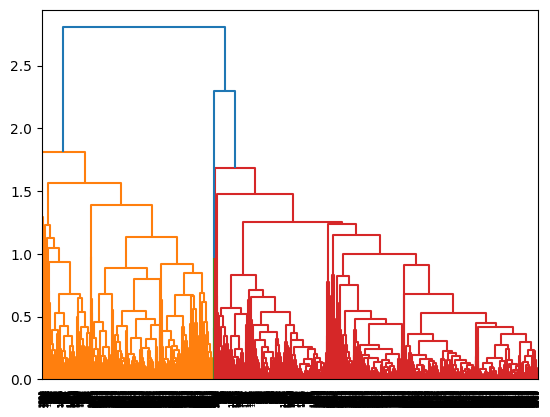

In [56]:
dendrogram=sch.dendrogram(sch.linkage(df1,method='complete'))

In [55]:
agg=AgglomerativeClustering(n_clusters=3,linkage='complete')

In [36]:
agg.fit(df1)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [37]:
df1['Clusters']=agg.labels_

In [38]:
df1['Clusters']

0       2
1       2
2       2
3       2
4       0
       ..
3994    2
3995    2
3996    0
3997    2
3998    2
Name: Clusters, Length: 3999, dtype: int64

In [39]:
from sklearn.metrics import silhouette_score

In [40]:
silhouette_score(df1,agg.labels_)

0.7497855857236293

## DBSCAN

In [41]:
df2=df.drop('Clusters',axis=1)

In [42]:
df2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


In [43]:
from sklearn.cluster import DBSCAN

In [44]:
eps=[0.1,0.2,0.3,0.4,0.5,0.6]
min_nodes=range(1,11)

In [45]:
# getting best eps and min_samples values to get high silhoette score
output=[]
for i in eps:
    for j in min_nodes:
        cluster=DBSCAN(eps=i,min_samples=j).fit(df2)
        labels=cluster.labels_
        score=silhouette_score(df2,labels)
        output.append([i,j,score])

In [46]:
a=pd.DataFrame(output)
a.head()

,0,1,2
0,0.1,1,-0.288549
1,0.1,2,-0.143430
2,0.1,3,0.143573
3,0.1,4,0.190021
4,0.1,5,0.188406


In [47]:
a.iloc[:,2].max()

0.5581360631729774

In [48]:
a[a[2]==0.5581360631729774]

,0,1,2
51,0.6,2,0.558136
52,0.6,3,0.558136
53,0.6,4,0.558136
54,0.6,5,0.558136


In [49]:
# therfore we can take eps=0.6 , min_samples=3

In [50]:
db=DBSCAN(eps=0.6,min_samples=3)

In [51]:
db.fit(df2)

DBSCAN(eps=0.6, min_samples=3)

In [52]:
np.unique(db.labels_)

array([-1,  0], dtype=int64)

In [53]:
cl=pd.DataFrame(db.labels_,columns=['Cluster'])